In [8]:
!pip install qiskit qiskit-aer --upgrade

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'1 0': 486, '0 0': 538}


In [10]:
print("Name : SANDEEP M")
print("Regno : 22MIS0193")

Name : SANDEEP M
Regno : 22MIS0193


Task 1 : Change Gate Order

H -> X
---



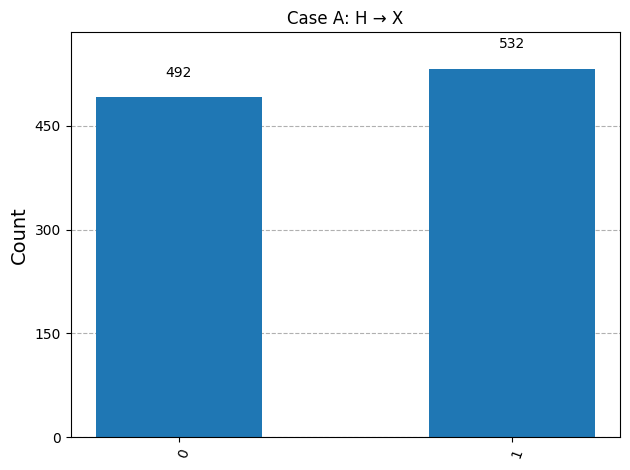

In [11]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

qc_a = QuantumCircuit(1, 1)
qc_a.h(0)
qc_a.x(0)
qc_a.measure(0, 0)

tqc_a = transpile(qc_a, sim)
result_a = sim.run(tqc_a, shots=1024).result()
counts_a = result_a.get_counts()

plot_histogram(counts_a, title="Case A: H → X")

X -> H




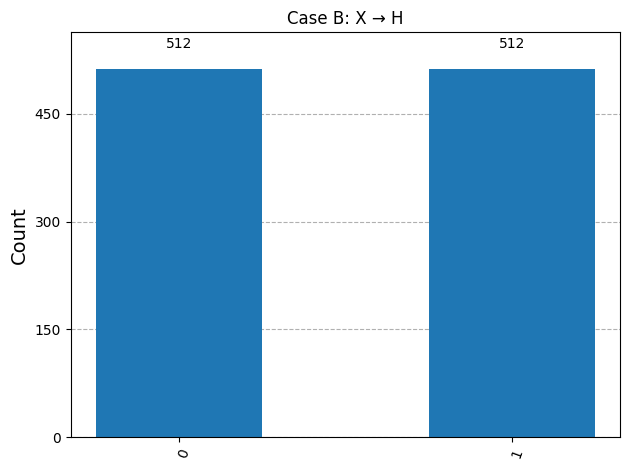

In [12]:
qc_b = QuantumCircuit(1, 1)
qc_b.x(0)
qc_b.h(0)
qc_b.measure(0, 0)

tqc_b = transpile(qc_b, sim)
result_b = sim.run(tqc_b, shots=1024).result()
counts_b = result_b.get_counts()

plot_histogram(counts_b, title="Case B: X → H")

Task 2 : Vary Rotation Angle

Running simulations for different rotation angles...
θ = 0.79 radians → counts = {'1': 125, '0': 899}


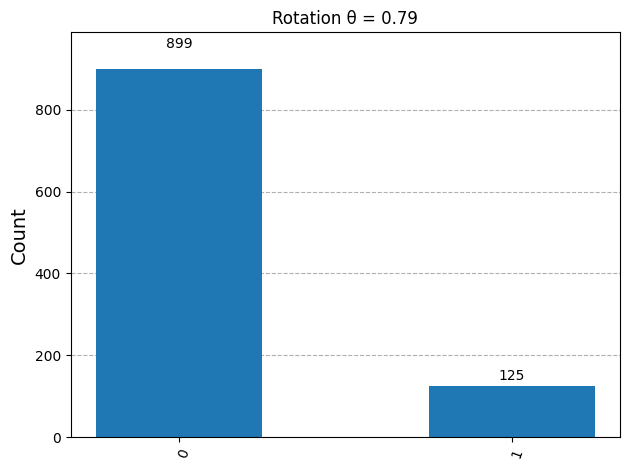

θ = 1.57 radians → counts = {'0': 499, '1': 525}


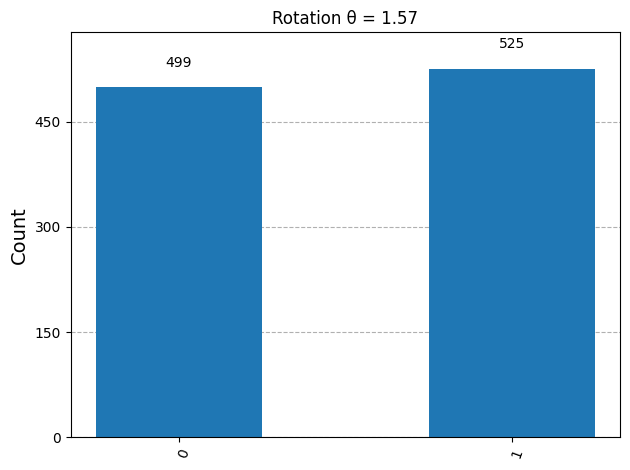

θ = 3.14 radians → counts = {'1': 1024}


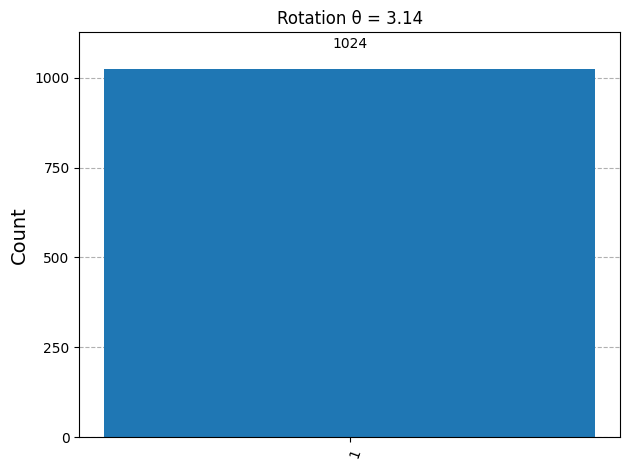

In [13]:
import numpy as np

print("Running simulations for different rotation angles...")
for theta in [np.pi/4, np.pi/2, np.pi]:
    # Create the H-Rz-H circuit
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.rz(theta, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Transpile and run the simulation
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    # Print the counts and plot the histogram for each angle
    print(f"θ = {theta:.2f} radians → counts = {counts}")
    display(plot_histogram(counts, title=f"Rotation θ = {theta:.2f}"))

Task 3: Remove a Gate

Without H gate: {'0': 1024}


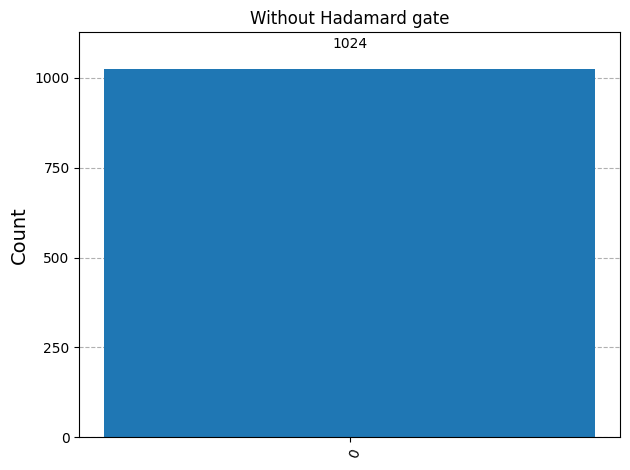

In [14]:
qc_noh = QuantumCircuit(1, 1)
qc_noh.rz(np.pi/2, 0)
qc_noh.measure(0, 0)

# Transpile and run the simulation
tqc_noh = transpile(qc_noh, sim)
result_noh = sim.run(tqc_noh, shots=1024).result()
counts_noh = result_noh.get_counts()

# Print the result and plot the histogram
print("Without H gate:", counts_noh)
plot_histogram(counts_noh, title="Without Hadamard gate")